In [23]:
import pandas as pd
import os

In [66]:
path = './Sales_Data/'

frames = []
with os.scandir(path) as dirs:
    for file in dirs:
        frames.append(pd.read_csv(file).dropna())

sales = pd.concat(frames)
sales = sales[sales['Order ID'] != 'Order ID']

### Convert data types

In [70]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format = '%m/%d/%y %H:%M') # Adding the format significantly improves the performance.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Add a column containing the Month

In [76]:
sales['month'] = sales['Order Date'].dt.month
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Add total price column

In [77]:
sales['total'] = sales['Quantity Ordered'] * sales['Price Each']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Group the total sales by the month

In [91]:
grouped_sales = sales.groupby('month').sum()['total']
grouped_sales

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: total, dtype: float64

### Plot the grouped data from above with matplotlib

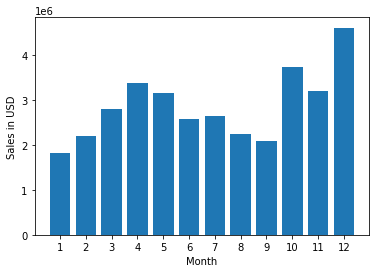

In [95]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, grouped_sales)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

TODO: Stopped video at 34:30, answer question 2 next.